# Decision Trees and Ensemble Learning 

## 6.1 Credit Risk scoreing project 

- Dataset: https://github.com/gastonstat/CreditScoring

## 6.2 Data Cleaning Preparation

- Downloading the dataset
- Re-enconding the categorical variables
- Doing the train/validation/test split

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.tree import export_text
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt

In [2]:
# !wget "https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv"

In [3]:
df = pd.read_csv('CreditScoring.csv')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
# Some of the features are encoded as numbers. Use the following code to de-code them:

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
for c in df.columns:
    if c == 99999999:
        df.c.replace(to_replace=99999999, value=np.nan)
        
df.describe().round()
#df.income.replace(to_replace=99999999, value=np.nan).max()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in df.columns:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [12]:
df = df[df.status!= 'unk'].reset_index(drop=True)

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [14]:
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

#y_train = (df_train.status == 'default').values
#y_val = (df_val.status == 'default').values
#y_test = (df_test.status == 'default').values

In [15]:
del df_train['status']
del df_val['status']
del df_test['status']

In [16]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
688,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2233,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3304,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
2271,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
1784,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
808,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
1857,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 6.3 Decision trees

- How a decission tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [18]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [19]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [20]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [21]:
val_dicts= df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
y_pred = dt.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)
print(f'train: {auc_train}')

y_pred = dt.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val, y_pred)
print(f'val: {auc_val}')


train: 0.6282660131823559
val: 0.6058644740984719


Overfitting :

The model grew to deep that learned all passible combinations and in the end when needs to make a decistion, it will contain just 1 or tree clients, so we let our tree memorize got one for the raning dataset, but for validation had a poor performance of .65. When this situation happens we can conclude that our model failed to generalize. We need our model to learn rules less specific. One way of doing this is to restrict its size: we can specify the max_depth parameter, which controls the maximum num- ber of levels. The more levels a tree has, the more complex rules it can learn 

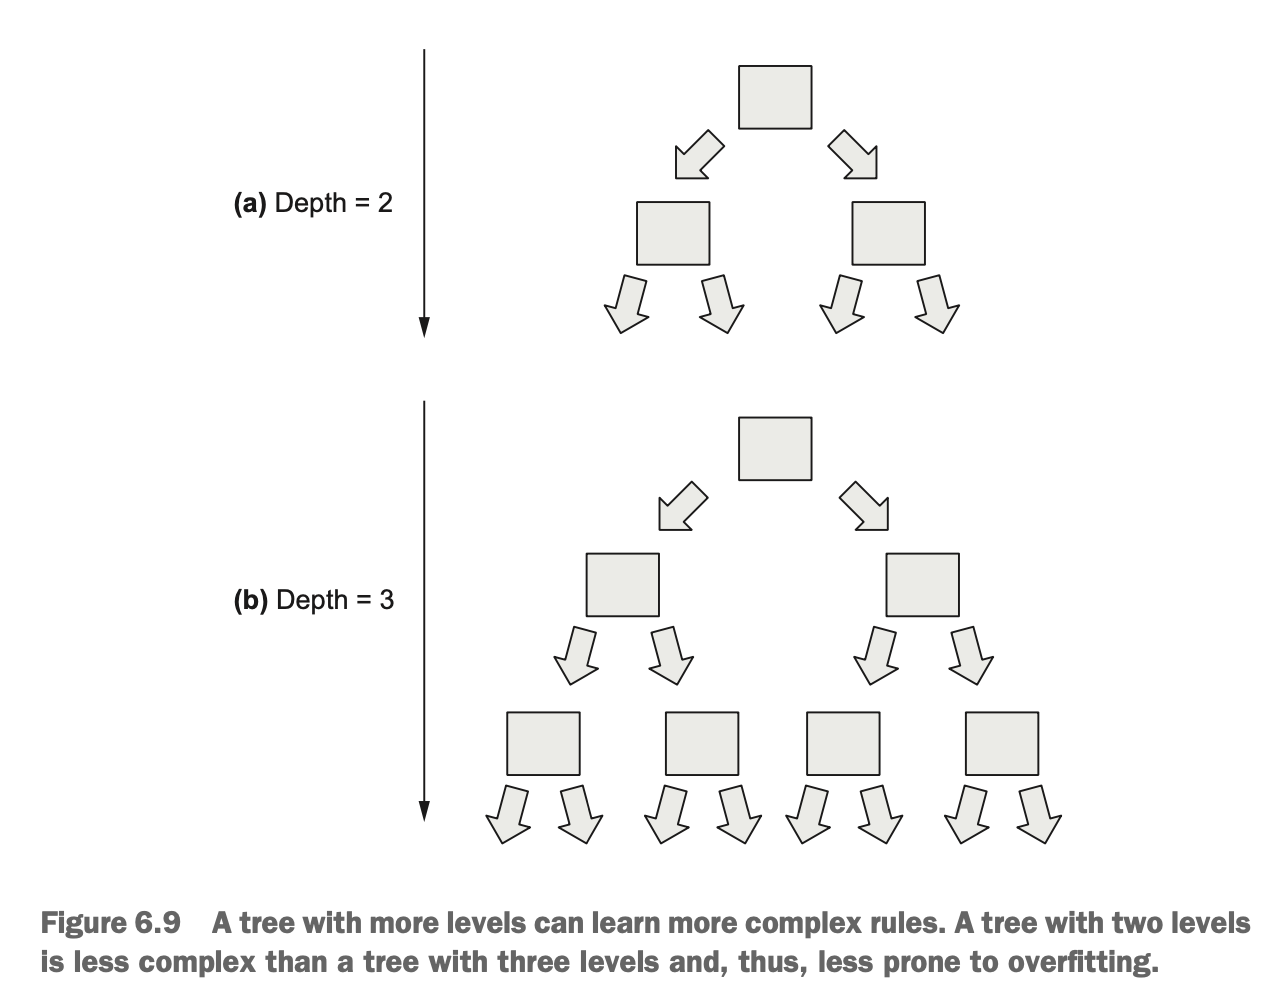

For records NO

Less or equal than 0.5 it is assigned to Default (or 1 or True) meaning they have records

We can see that for greater than 0.5 it is assigned to OK (or zero or false), no records

In [23]:
#Decision stump
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



**FOR RECORDS=YES**

- For records=yes > 0.5 is True when the values for records are yes and is set to 1

- For records=yes <= 0.5 is False when the values for records are no and is set to 0

**FOR RECORDS=NO**

Si Mayor a 0.5, no tiene records

- For records=no > 0.5 is True when the values for records are no and is set to 1

- For records=no <= 0.5 is False when the values for records are no and is set to =

## 6.4 Decision Tree Learning Algorithm

1. Assets example:

In [24]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [25]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [26]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [27]:
from IPython.display import display

How to find the best T?

We iterate over F features in Features:

    Find all thresholds for F
    
    For T in thresholds:
    
        Split Dataser using "F>T"
        
Select then, the condition with the lowest impurity

Impurity

These groups should be as homogeneous as possible. Ideally, each group should contain only observations of one class. In this case, we call these groups pure.

For example, if we have a group of four customers with outcomes [“default,” “default,” “default,” “default”], it’s pure: it contains only customers who defaulted. But a group [“default,” “default,” “default,” “OK”] is impure: there’s one customer who didn’t default.

When training a decision tree model, we want to find such T that the impurity of both groups is minimal.
So, the algorithm for finding T is quite simple:
- Try all possible values of T.
- For each T, split the dataset into left and right groups and measure their impurity.
- Select T that has the lowest degree of impurity.

We can use different criteria for measuring impurity. The easiest one to understand is the misclassification rate, which says how many observations in a group don’t belong to the majority class.

For T value = 4000

We will calculate the misclassification rate for the split T = 4000

- For the left group, the majority class is “default.” There are four data points in total, and one doesn’t belong to “default.” The misclassification rate is 25% (1/4).

- For the right group, “OK” is the majority class, and there’s one “default.” Thus, the misclassification rate is also 25% (1/4).

- To calculate the overall impurity of the split, we can take the average across both groups. In this case, the average is 25%.

Note: In reality use weighted average instead of simple average, by  weighting each group proportionally to its size.


In [28]:
for T in Ts:
    print()
    print(f'T value: {T}')
    df_left = df_example[df_example.assets > T] 
    df_right = df_example[df_example.assets <= T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    


T value: 0


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64

T value: 2000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64

T value: 3000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64

T value: 4000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64

T value: 5000


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64

T value: 8000


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


Best T = 3,000, impurity:10%

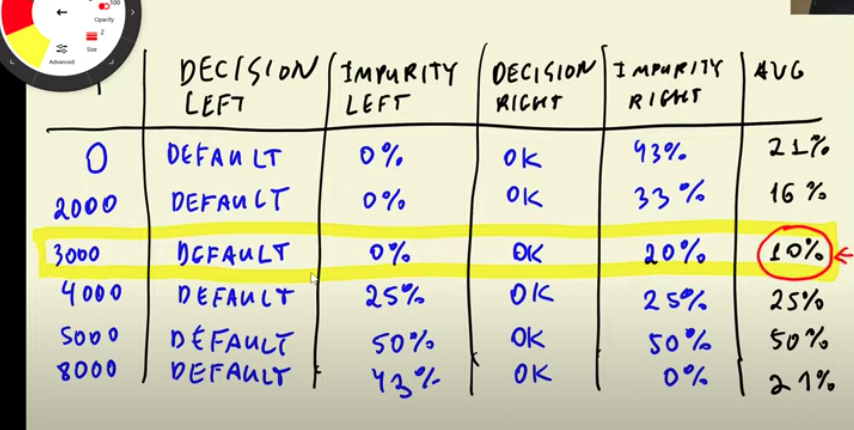

2. Debt example:

In [29]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [30]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [31]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [32]:
for feature, Ts, in thresholds.items():
    print('#####################')
    print(feature)
    print(f'T value: {T}')
    for T in Ts:
        df_left = df_example[df_example[feature] > T] 
        df_right = df_example[df_example[feature] <= T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()
    print('#####################')
    

#####################
assets
T value: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64



,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

#####################
#####################
debt
T value: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64



,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

#####################


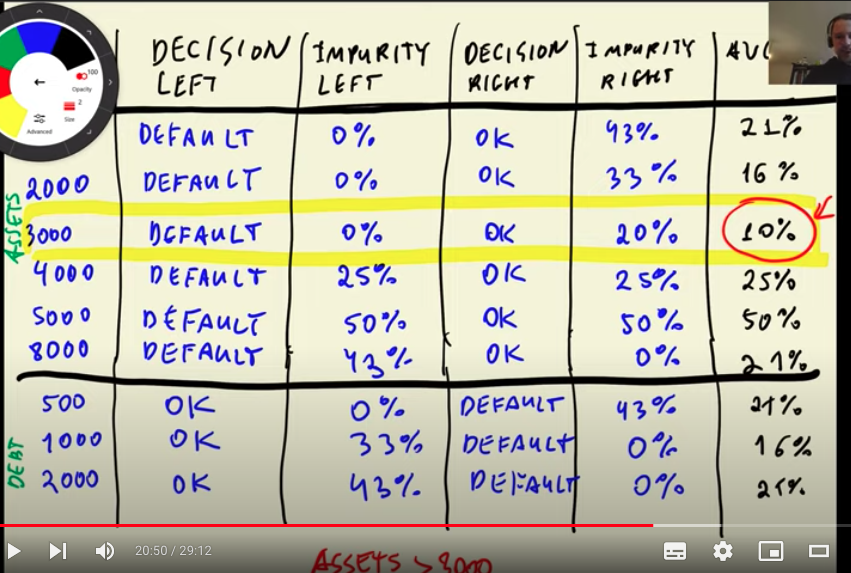

Stopping criteria

Whent o stop splitting?

- Group already Pure
- Three reached depth limit
- Group too small to Split

Decision tree learning Algorithm

- Find best split
- Stop if max depth is reached
- If left is sufficiently large and not pure
    - Repeat for left
- If right is sufficiently large and not pure
    - Repeat for right
   

## 6.5 Decision Trees Parameter Tuning 

The process of finding the best set of parameters is called parameter tuning. We usually do it by changing the model and checking its score on the validation dataset. In the end, we use the model with the best validation score.
As we have just learned, we can tune two parameters:

- max_depth
- min_leaf_size

We want to find the best parameters that the performance of model o whatever the metric chosen is maximazed or minimzed. SInce we selected auc, we want to maximize it.

In [33]:
 for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
        dt = DecisionTreeClassifier(max_depth=depth)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.747
  10 -> 0.678
  15 -> 0.659
  20 -> 0.664
None -> 0.660


In [34]:
scores = []

for m in [4, 5, 6]:
    #print('depth: %s' % m)
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((m,s,auc))
        #print('%s -> %.3f' % (s, auc))

In [35]:
columns = ['max_depth', 'min_sample_leaves', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_sample_leaves,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


In [36]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_sample_leaves,auc
19,6,15,0.784856
18,6,10,0.777521
22,6,100,0.776434
12,5,20,0.773537
20,6,20,0.773337


In [37]:
df_scores_pivot =  df_scores.pivot(index='min_sample_leaves',
                                   columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth              4      5      6
min_sample_leaves                     
1                  0.761  0.767  0.746
5                  0.761  0.768  0.762
10                 0.761  0.762  0.778
15                 0.764  0.772  0.785
20                 0.761  0.774  0.773
50                 0.753  0.767  0.770
100                0.756  0.763  0.776
200                0.747  0.759  0.768

<AxesSubplot:xlabel='None-max_depth', ylabel='min_sample_leaves'>

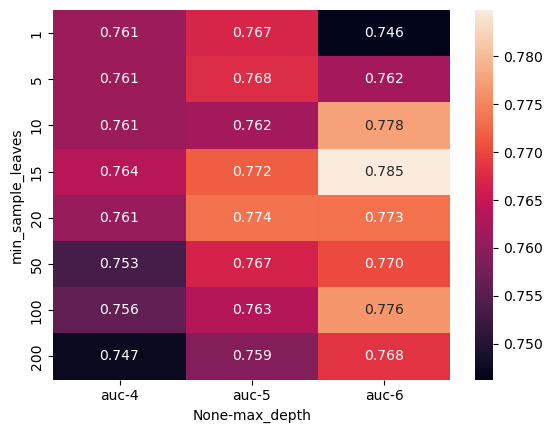

In [38]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

Note that when there are too many parameters it is not possible/ practical try all of them, so it is better to look first for the best depth and then look for the best sample leaves

In [39]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and random forest

- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning Random forest

In Random Forest each treee is independent: Its trained on a different set of fetures. After individual tree is trained, we combine all their decisions together to get the fnal decission

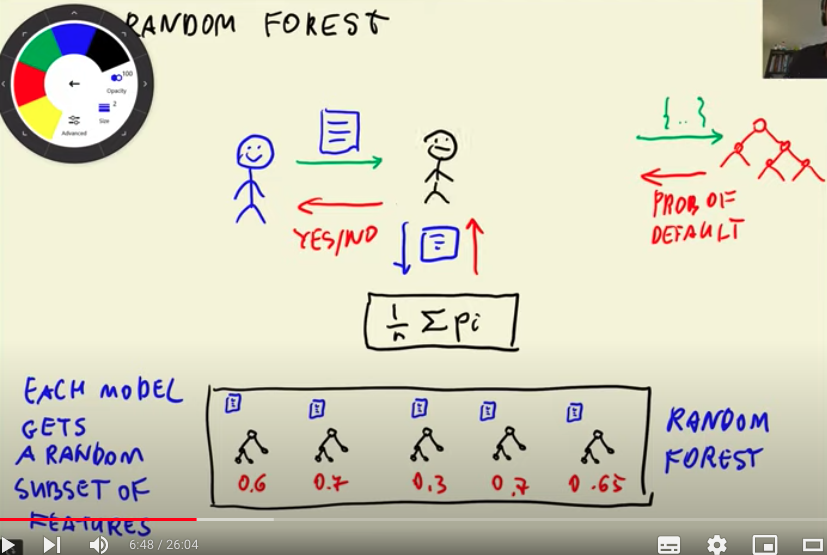

In [40]:
#n_estimators number of models
#each one of the 10 models will get a random subset of features
#for reproducibility we will fix it to 1
#Random forest is a way of combining, completely independent, multiple decisions trees into a single one (ensambling-model)
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [41]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [42]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [43]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

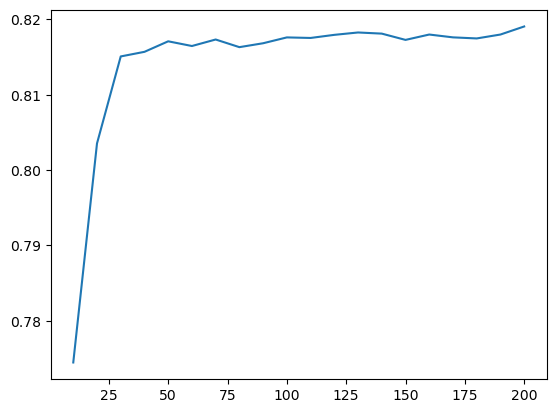

In [44]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Tuning for max depth parameter

In [45]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, d, auc))

In [46]:
columns = ['n_estimators', 'max_depth', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,n_estimators,max_depth,auc
0,10,5,0.787699
1,20,5,0.797731
2,30,5,0.800305
3,40,5,0.799708
4,50,5,0.799878


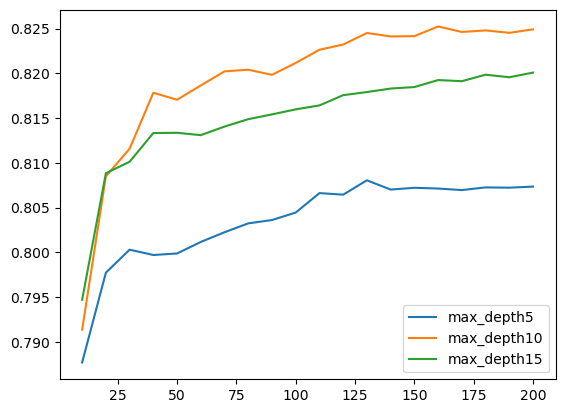

In [47]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth{d}')
plt.legend()
plt.show()

In [48]:
#df_scores[df_scores.max_depth==d]

In [49]:
max_depth = 10

Tuning minimun samples leafs

In [50]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, s, auc))

In [51]:
columns = ['n_estimators', 'min_samples_leafs', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,n_estimators,min_samples_leafs,auc
0,10,1,0.791365
1,20,1,0.808496
2,30,1,0.811584
3,40,1,0.817839
4,50,1,0.817058


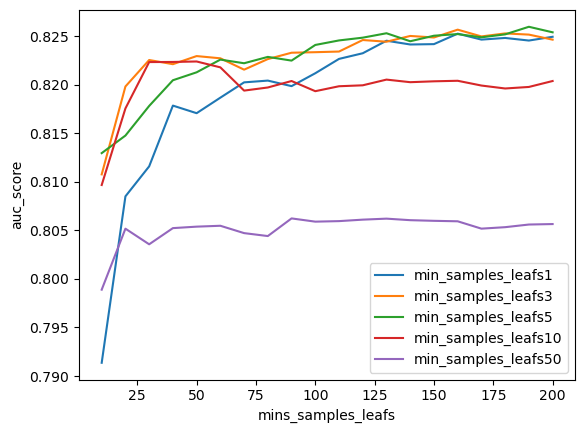

In [52]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leafs==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leafs{s}')

plt.ylabel('auc_score')
plt.xlabel('mins_samples_leafs')
plt.legend()
plt.show()

In [53]:
min_samples_leaf = 3

Final Random Forest Model

This model will be compared agains all different models.

review parameters = max_features and bootstrap

In [54]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

## 6.7 Gradient Boosting and XGBoost

- Gradient Boosting vs. Random forest
- Installing XGBoost
- Training the first Model
- Performance monitoring
- Parsing xgboost's monitoring output

Random forest is not the only way of combining multiple models together in one ensamble, however. We can train model sequantially - each next model tries to fix erros from the previous one:

- Tran the first model
- Look at the errosrs it makes
- Train another model that fixes these errors
- Look at errors again, repeat, sequentially.
- Finally combine multiple predictions into a final prediction

This way of combining models is boosting. Gradient Boosting is a particular variation of this approach that works especially well with trees.

XGBoost: Extreme gradient boosting

We have many good implementations of the gradient boosting model: GradientBoosting Classifier, from Scikit-learn, XGBoost, LightGBM and CatBoost. In this chapter, we use XGBoost (short for “Extreme Gradient Boosting”), which is the most popular implementation.

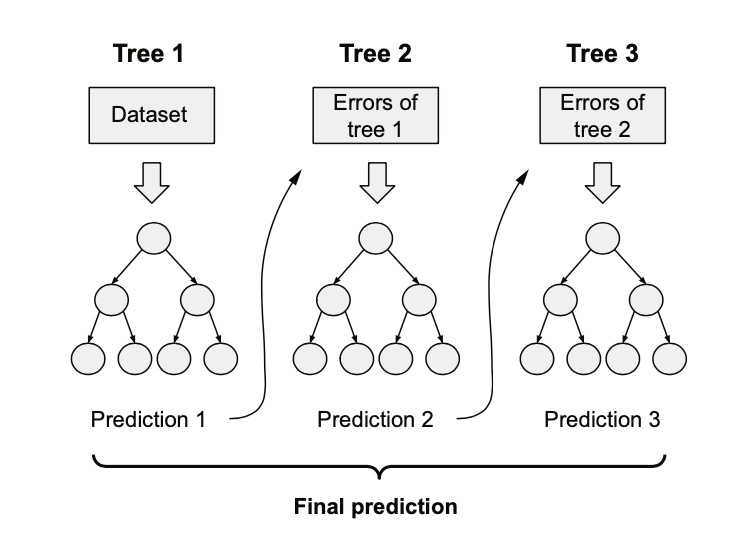

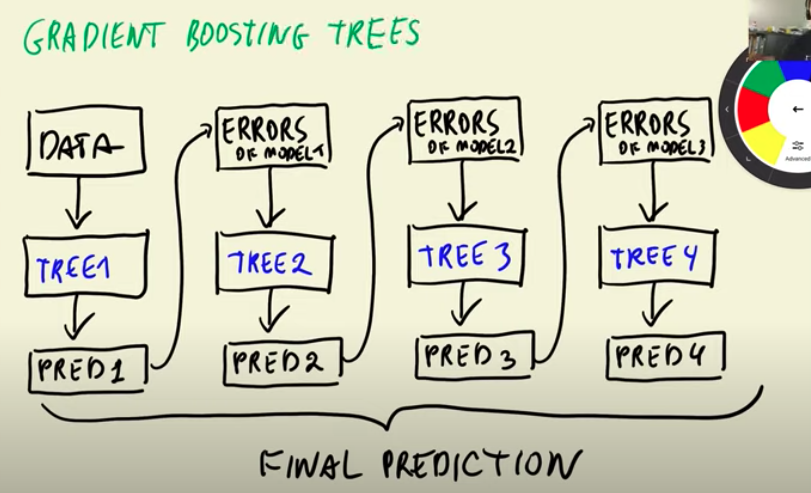


In [55]:
import xgboost as xgb

In [56]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/usr/local/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
xgb_params = {
    'eta':0.3, 
    'max_depth':6, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'nthread:':4,
    
    'seed': 1, #for reproducibility
    'verbosity': 1, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

[05:46:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "nthread:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [58]:
y_pred = model.predict(dval)

In [59]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

To get an idea of how AUC changes as the number of trees grows, we can use a watchlist — a built-in feature in XGBoost for monitoring model performance.
A watchlist is a Python list with tuples. Each tuple contains a DMatrix and its name. 

IN XGBOOST, We can see what's happening at each step of the training process. after each iteration after each new tree is trained, we can immediatelly evaluate it in our validation data

This is how we typically do it:

In [60]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

We first train our first tree and then this first tree is evaluated on the training dataset and on the validation dataset

In [61]:
%%capture output

xgb_params = {
    'eta':0.3, 
    'max_depth':6, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain,
                  evals=watchlist,
                  verbose_eval=5, #print each 5 steps
                  num_boost_round=200)

In [62]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [84]:
#the output is captured by "%%capture output"
df_score = parse_xgb_output(output)
#df_score

We can see around iteration 60 became to overfit, it stagnates the validation model.

We can see that the train model stays at 100%, but for validation dataset seems to decline

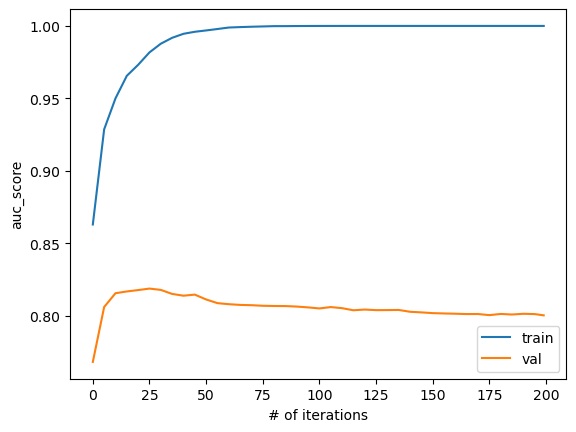

In [64]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')

plt.ylabel('auc_score')
plt.xlabel('# of iterations')
plt.legend()
plt.show()

## 6.8 XGBoost Parameter Tuning

- eta
- max_depth
- min_child_weight


### Tunning eta

In boosting, each tree tries to correct the mistakes from the previous iterations. Learning rate determines the weight of this correction. If we have a large value for eta, the correction overweights the previous predictions significantly. On the other hand, if the value is small, only a small fraction of this correction is used.

In practice it means:

- If eta is too large, the model starts to overfit quite early without realizing its full potential.
- If it’s too small, we need to train too many trees before it can produce good results. The default value of 0.3 is reasonably good for large datasets, but for smaller datasets like ours, we should try smaller values like 0.1 or even 0.05.

In [90]:
scores_eta = {}

In [101]:
%%capture output

xgb_params = {
    'eta':0.01, 
    'max_depth':6, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain,
                  evals=watchlist,
                  verbose_eval=5, #print each 5 steps
                  num_boost_round=200)#same as n_estimators

In [102]:
key_text_eta = f"eta = {xgb_params['eta']}"
scores_eta[key_text_eta] = parse_xgb_output(output)
key_text_eta

'eta = 0.01'

In [103]:
#scores is a dictionary and by key_text we access to the first element
#scores_eta[key_text_eta]

In [104]:
scores_eta.keys()

dict_keys(['eta = 0.3', 'eta = 0.1', 'eta = 1', 'eta = 0.05', 'eta = 0.01'])

The best eta prameter is 0.1, since doesn't require too much trees.

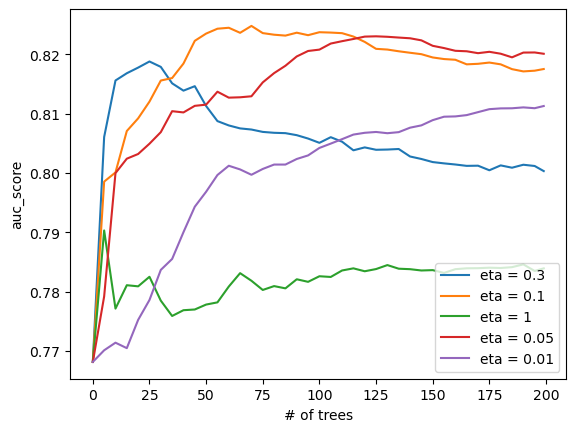

In [105]:
for key_eta, df_score in scores_eta.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key_eta)

plt.ylabel('auc_score')
plt.xlabel('# of trees')
plt.legend()
plt.show()

### Tunning max_depth

max_depth: The maximum allowed depth of each tree; the same as max_depth in DecisionTreeClassifier from Scikit-learn.

In [71]:
scores_depth = {}

In [118]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth':10, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain,
                  evals=watchlist,
                  verbose_eval=5, #print each 5 steps
                  num_boost_round=200)#same as n_estimators

In [119]:
key_text_depth = f"max_depth = {xgb_params['max_depth']}"
scores_depth[key_text_depth] = parse_xgb_output(output)
key_text_depth

'max_depth = 10'

In [120]:
#scores is a dictionary and by key_text we ccess to the first element
#scores_depth[key_text_depth]

In [121]:
scores_depth.keys()

dict_keys(['max_depth = 10', 'max_depth = 3', 'max_depth = 4', 'max_depth = 6'])

Even though depth 3 learns slower and requires more trees, has a good auc score.

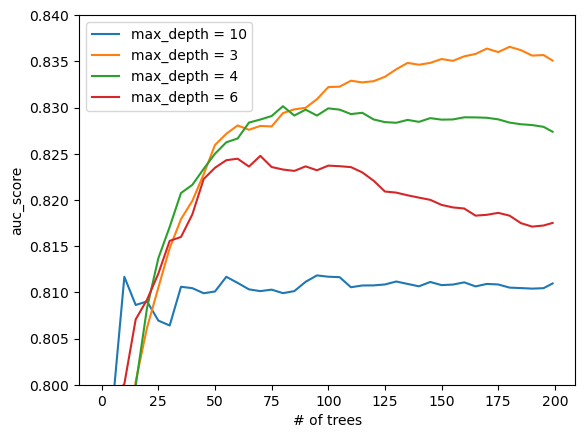

In [124]:
for key_depth, df_score in scores_depth.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key_depth)

plt.ylabel('auc_score')
plt.xlabel('# of trees')
plt.ylim(0.8, 0.84)
plt.legend()

### Tunning min_child_weight:

min_child_weight: The minimal number of observations in each group; the same as min_leaf_size in DecisionTreeClassifier from Scikit-learn.

In [129]:
scores_min_child = {}

In [134]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth':3, #how many levels
    'min_child_weight':10, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain,
                  evals=watchlist,
                  verbose_eval=5, #print each 5 steps
                  num_boost_round=200)#same as n_estimators



In [135]:
key_text_min = f"min_child = {xgb_params['min_child_weight']}"
scores_min_child[key_text_min] = parse_xgb_output(output)
key_text_min

'min_child = 10'

In [136]:
#scores is a dictionary and by key_text we access to the first element
#scores_min_child[key_text_min]

In [137]:
scores_min_child.keys()

dict_keys(['min_child = 30', 'min_child = 1', 'min_child = 10'])

We go for the child one, since is the default and the difference is tiny.

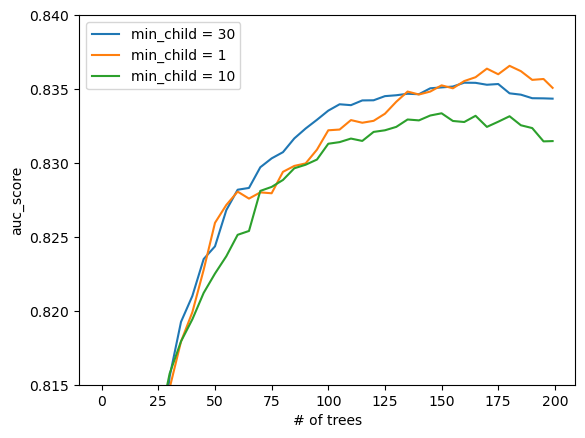

In [138]:
for key_min_child, df_score in scores_min_child.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key_min_child)

plt.ylabel('auc_score')
plt.xlabel('# of trees')
plt.ylim(0.815, 0.84)
plt.legend()

Other parameters:

- subsample: select a sub- set of rows (customers). This is called subsampling, and it helps to prevent over- fitting. In XGBoost, the subsample parameter controls the fraction of examples we select for training each tree in the ensemble. Try values from 0.4 to 1.0 with a step of 0.1. Usually the optimal values are between 0.6 and 0.8.


- colsample_bytree: controls the number of features we select for each tree — it’s similar to max_features from the random forest. Experiment with this parameter, and see if it improves the performance: try val- ues from 0.1 to 1.0 with a step of 0.1. Usually the optimal values are between 0.6 and 0.8, but sometimes 1.0 gives the best result.


- lambda and alpha

## Selecting the best model 

### Decision Tree 

In [140]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [142]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.785470804775859

### Random Forest

In [143]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [144]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8233361991717324

In [146]:
xgb_params = {
    'eta':0.1, 
    'max_depth':3, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=175)#same as n_estimators

In [148]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [150]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [151]:
del df_full_train['status']

In [171]:
dicts_full_train = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [172]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                        feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [173]:
xgb_params = {
    'eta':0.1, 
    'max_depth':3, #how many levels
    'min_child_weight':1, #how many min sample leafs. How many observations we should have in a leaf node
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'seed': 1, #for reproducibility
    'nthread:':4,
    'verbosity': 0, #show only warnings
    
}

model = xgb.train(xgb_params, dfulltrain,
                  num_boost_round=175)#same as n_estimators


In [174]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8322662626460096